### U-net for diffusion models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.nn as nn
from util import (
    get_torch_size_string
)
from diffusion import (
    get_ddpm_constants,
    plot_ddpm_constants,
    DiffusionUNet,
)
from dataset import mnist
np.set_printoptions(precision=3)
th.set_printoptions(precision=3)
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(th.__version__))

PyTorch version:[2.0.1].


Device

In [2]:
device = 'mps'
print ("device:[%s]"%(device))

device:[mps]


DDPM constants

[ 0] key:[schedule_name]
[ 1] key:[T]
[ 2] key:[timesteps]
[ 3] key:[betas]
[ 4] key:[alphas]
[ 5] key:[alphas_bar]
[ 6] key:[alphas_bar_prev]
[ 7] key:[sqrt_recip_alphas]
[ 8] key:[sqrt_alphas_bar]
[ 9] key:[sqrt_one_minus_alphas_bar]
[10] key:[posterior_variance]


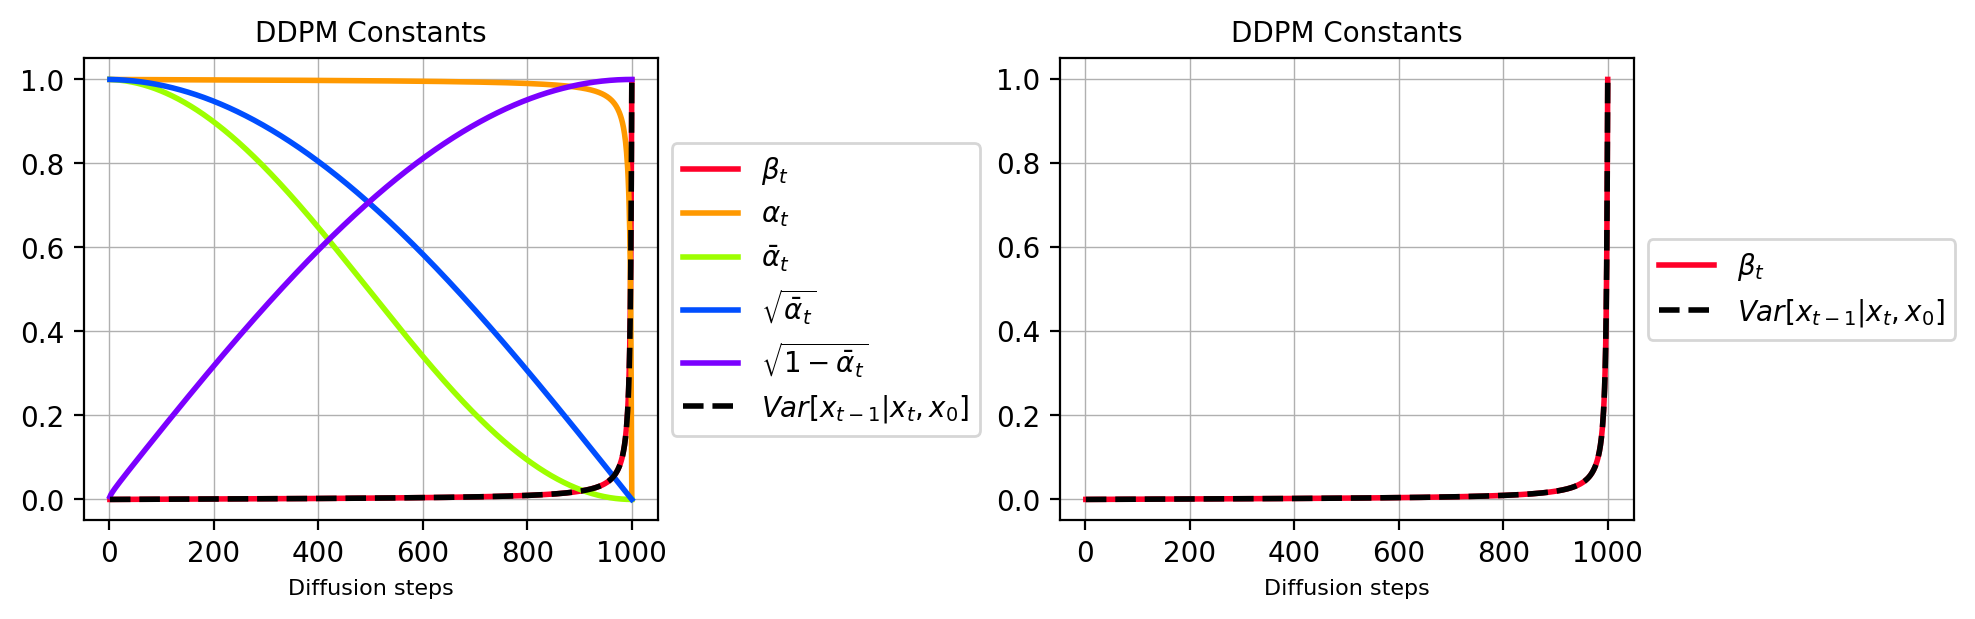

In [3]:
dc = get_ddpm_constants(
    schedule_name = 'cosine', # 'linear', 'cosine'
    T             = 1000,
    np_type       = np.float32,
)
for k_idx,key in enumerate(dc.keys()):
    print ("[%2d] key:[%s]"%(k_idx,key))
plot_ddpm_constants(dc)

### 1-dimensional case: `[B x C x L`]

In [4]:
# Instantiate U-net
unet = DiffusionUNet(
    name             = 'unet',
    dims             = 1,
    n_in_channels    = 3,
    n_model_channels = 64,
    n_emb_dim        = 128,
    n_enc_blocks     = 2, # number of encoder blocks
    n_dec_blocks     = 2, # number of decoder blocks
    n_groups         = 16, # group norm paramter
    device           = device,
)
# Inputs, timesteps:[B] and x:[B x C x L]
batch_size = 2
x = th.randn(batch_size,3,200).to(device) # [B x C x L]
timesteps = th.linspace(1,dc['T'],batch_size).to(th.int64).to(device) # [B]
out,intermediate_output_dict = unet(x,timesteps)
print ("Input: x:[%s] timesteps:[%s]"%(
    get_torch_size_string(x),get_torch_size_string(timesteps)
))
print ("Output: out:[%s]"%(get_torch_size_string(out)))

Input: x:[2x3x200] timesteps:[2]
Output: out:[2x3x200]


Print intermediate layer shapes

In [5]:
for k_idx,key in enumerate(intermediate_output_dict.keys()):
    z = intermediate_output_dict[key]
    print ("[%2d] key:[%12s] shape:[%12s]"%(k_idx,key,get_torch_size_string(z)))

[ 0] key:[           x] shape:[     2x3x200]
[ 1] key:[    x_lifted] shape:[    2x64x200]
[ 2] key:[h_enc_att_00] shape:[    2x64x200]
[ 3] key:[h_enc_res_01] shape:[    2x64x200]
[ 4] key:[h_enc_att_02] shape:[    2x64x200]
[ 5] key:[h_enc_res_03] shape:[    2x64x200]
[ 6] key:[ h_enc_stack] shape:[   2x128x200]
[ 7] key:[h_dec_att_00] shape:[    2x64x200]
[ 8] key:[h_dec_res_01] shape:[    2x64x200]
[ 9] key:[h_dec_att_02] shape:[    2x64x200]
[10] key:[h_dec_res_03] shape:[    2x64x200]
[11] key:[         out] shape:[     2x3x200]


### 2-dimensional case: `[B x C x W x H]`

In [6]:
# Instantiate U-net
unet = DiffusionUNet(
    name             = 'unet',
    dims             = 2,
    n_in_channels    = 16,
    n_model_channels = 64,
    n_emb_dim        = 128,
    n_enc_blocks     = 2, # number of encoder blocks
    n_dec_blocks     = 2, # number of decoder blocks
    n_groups         = 16, # group norm paramter
    device           = device,
)
# Inputs, timesteps:[B] and x:[B x C x W x H]
batch_size = 2
x = th.randn(batch_size,16,1,200).to(device) # [B x C x W x H]
timesteps = th.linspace(1,dc['T'],batch_size).to(th.int64).to(device) # [B]
out,intermediate_output_dict = unet(x,timesteps)
print ("Input: x:[%s] timesteps:[%s]"%(
    get_torch_size_string(x),get_torch_size_string(timesteps)
))
print ("Output: out:[%s]"%(get_torch_size_string(out)))

Input: x:[2x16x1x200] timesteps:[2]
Output: out:[2x16x1x200]


In [7]:
for k_idx,key in enumerate(intermediate_output_dict.keys()):
    z = intermediate_output_dict[key]
    print ("[%2d] key:[%12s] shape:[%12s]"%(k_idx,key,get_torch_size_string(z)))

[ 0] key:[           x] shape:[  2x16x1x200]
[ 1] key:[    x_lifted] shape:[  2x64x1x200]
[ 2] key:[h_enc_att_00] shape:[  2x64x1x200]
[ 3] key:[h_enc_res_01] shape:[  2x64x1x200]
[ 4] key:[h_enc_att_02] shape:[  2x64x1x200]
[ 5] key:[h_enc_res_03] shape:[  2x64x1x200]
[ 6] key:[ h_enc_stack] shape:[ 2x128x1x200]
[ 7] key:[h_dec_att_00] shape:[  2x64x1x200]
[ 8] key:[h_dec_res_01] shape:[  2x64x1x200]
[ 9] key:[h_dec_att_02] shape:[  2x64x1x200]
[10] key:[h_dec_res_03] shape:[  2x64x1x200]
[11] key:[         out] shape:[  2x16x1x200]
